In [31]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('diabetes_data_upload.csv')

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
le=LabelEncoder()

In [10]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [11]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [13]:
X=df.drop(['class','Age'],axis=1)
y=df['class']

In [15]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
acc_score=[0,0]

for i in range(2,20):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    acc_score.append(knn.score(X_test,y_test))
    
print(acc_score)

[0, 0, 0.9711538461538461, 0.9903846153846154, 0.9711538461538461, 0.9711538461538461, 0.9615384615384616, 0.9615384615384616, 0.9230769230769231, 0.9423076923076923, 0.9326923076923077, 0.9423076923076923, 0.9519230769230769, 0.9519230769230769, 0.9519230769230769, 0.9615384615384616, 0.9519230769230769, 0.9423076923076923, 0.9326923076923077, 0.9423076923076923]


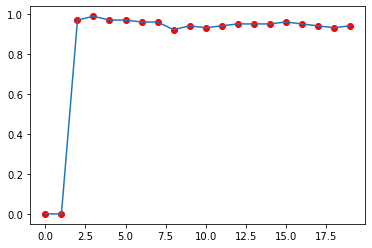

In [21]:
plt.scatter(range(20),acc_score,marker='o',c='r')
plt.plot(range(20),acc_score)

In [22]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.score(X_test,y_test)

0.9903846153846154

In [24]:
y_pred=knn.predict(X_test)

In [27]:
n_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [28]:
n_df

,Actual,Predicted
422,1,1
107,1,1
253,1,1
235,0,0
311,0,0
...,...,...
239,0,0
468,0,0
49,1,1
100,1,1


<AxesSubplot:>

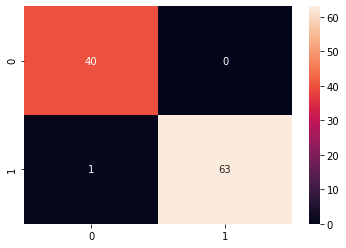

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)